In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [4]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

os.environ["OPENAI_API_KEY"] = os.getenv("QWEN_API_KEY")

llm = ChatOpenAI(
    openai_api_base="http://localhost:8080",
    model = "qwen2.5-7b",
    temperature=0.1,
    extra_body={
        "metadata": {
            "generation_name": "titus-generation-langchain-client",
            "generation_id": "langchain-client-gen-id1",
            "trace_id": "langchain-client-trace-id1",
            "trace_user_id": "langchain-client-user-id1"
        }
    }
)

In [5]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    ),
    HumanMessage(
        content="Why is the sky blue?"
    ),
]
response = llm.invoke(messages)

In [7]:
from IPython.display import display, Markdown

display(Markdown(response.content))

The sky appears blue because of a phenomenon called Rayleigh scattering. When sunlight enters the Earth's atmosphere, it collides with molecules and small particles in the air. Sunlight is made up of different colors, each of which has a different wavelength. Blue light waves are shorter and scatter more than other colors when they collide with these tiny particles.

The sky looks blue during the day because our eyes are constantly bombarded by this scattered blue light. At sunrise and sunset, the light has to travel through more of the Earth's atmosphere to reach us, causing even the blue light to be scattered in many directions. This leaves mostly red and orange hues visible to us, which is why sunrises and sunsets often appear red or pink.

This explanation was first given by Lord Rayleigh in 1871, hence the name "Rayleigh scattering."

In [13]:
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent

@tool(return_direct=True)
def get_weather(city: str) -> str:  
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

agent = create_react_agent(
    model = llm,
    tools=[get_weather],
    prompt="You are a helpful assistant"
)

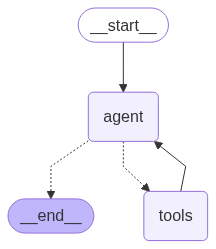

In [9]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [14]:
response = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the weather in Singapore?"
            }
        ]
    },
    debug=True
)

[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='33598984-d5e4-4b76-8d39-96fe452bd1e9')]}
[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'function': {'arguments': '{"city": "Singapore"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 138, 'total_tokens': 155, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'ollama/qwen2.5', 'system_fingerprint': None, 'id': 'chatcmpl-daa90350-1b48-43df-92c6-af426bba874d', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--602e9e7d-7a5f-450a-82d7-8d87058ddd73-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'type': 'tool_call'}], usage_metadata={'input_to

In [15]:
response

{'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='33598984-d5e4-4b76-8d39-96fe452bd1e9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'function': {'arguments': '{"city": "Singapore"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 138, 'total_tokens': 155, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'ollama/qwen2.5', 'system_fingerprint': None, 'id': 'chatcmpl-daa90350-1b48-43df-92c6-af426bba874d', 'service_tier': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--602e9e7d-7a5f-450a-82d7-8d87058ddd73-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': 'call_ebf718d9-c912-41b8-be56-a6b50b872dbc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 138, 'output_tokens': 17, 'total_to

Vanilla LangChain Ollama

In [16]:
@tool(return_direct=True)
def get_weather(city: str) -> str:  
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

In [10]:
from langchain_ollama import ChatOllama

llm2 = ChatOllama(
    model="llama3.1",
    temperature=0,
    # other params...
)
agent2 = create_react_agent(
    model = llm2,
    tools=[get_weather],
    prompt="You are a helpful assistant"
)
response = agent2.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the weather in Singapore?"
            }
        ]
    },
    debug=True
)

[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='e91fbaa3-55d4-4025-b199-eeb488de670e')]}
[updates] {'agent': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.1', 'created_at': '2025-07-07T15:18:12.899137Z', 'done': True, 'done_reason': 'stop', 'total_duration': 638185292, 'load_duration': 28646917, 'prompt_eval_count': 156, 'prompt_eval_duration': 359401916, 'eval_count': 17, 'eval_duration': 249406667, 'model_name': 'llama3.1'}, id='run--b37b6462-1a90-49b9-854c-4bd644be7b2d-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Singapore'}, 'id': '5b90e77a-4b45-43e2-be29-72f93a2158e2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 156, 'output_tokens': 17, 'total_tokens': 173})]}}
[values] {'messages': [HumanMessage(content='What is the weather in Singapore?', additional_kwargs={}, response_metadata={}, id='e91fbaa3-55d4-4025-b199-eeb488de670e'), AI

In [13]:
display(Markdown(response['messages'][-1].content))

Based on the tool call response, I can provide a more accurate answer:

The current weather in Singapore is mostly sunny with a high chance of sunshine throughout the day. The temperature is expected to be around 32°C (90°F) with a gentle breeze. It's a great time to enjoy outdoor activities and explore the city!

In [19]:
llm_with_tools=llm.bind_tools([get_weather])
result = llm_with_tools.invoke("What is the weather in Singapore?")

In [ ]:
result.tool_calls

[{'name': 'get_weather',
  'args': {'city': 'Singapore'},
  'id': 'call_825b952f-8965-41d7-ade2-b8554cd34dbf',
  'type': 'tool_call'}]